<a href="https://colab.research.google.com/github/Ryo-Neko/docs/blob/master/get_exif_and_rename.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import datetime as dt

from PIL import Image
from PIL.ExifTags import TAGS
import pandas as pd

In [ ]:
def get_exif(exif:Image.Exif) -> pd.Series:
    """
    Exif情報を人間が見て分かるように変換する。
    """
    dict_exif = exif.get_ifd(0x8769)
    sr_exif = pd.Series(dict_exif).rename(TAGS)
    return sr_exif

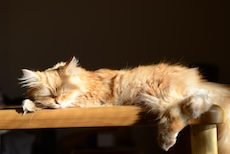

In [ ]:
FPATH = "mikan.JPG" # 画像のパス

with Image.open(FPATH) as target_im:
    exif = target_im.getexif() # exif情報の取得
    mikan = target_im.copy()

mikan # うちの猫

In [ ]:
sr_exif = get_exif(exif)
sr_exif.head(10)
# 他にＧＰＳ情報の取得なども出来るけど今回は載せてないです。

ExifVersion                            b'0230'
ComponentsConfiguration    b'\x01\x02\x03\x00'
CompressedBitsPerPixel                     4.0
DateTimeOriginal           2024:01:14 13:30:16
DateTimeDigitized          2024:01:14 13:30:16
ExposureBiasValue                          0.0
MaxApertureValue                           3.0
MeteringMode                                 2
LightSource                                  0
Flash                                       16
dtype: object

In [ ]:
sr_exif['DateTimeOriginal']

'2024:01:14 13:30:16'

In [ ]:
shoot_date = dt.datetime.strptime(sr_exif['DateTimeOriginal'], '%Y:%m:%d %H:%M:%S') # datetime型に変換した方が個人的には楽
new_path = shoot_date.strftime("%Y%m%d_%H%M%S.jpg") # 新しいファイル名

In [ ]:
os.rename(FPATH, new_path) # リネーム